# Intro!

Hello, lovely people. We're going to do a little review on vectors, matrices, and some basic operations you have come across before. The idea is to give you a different perspective on things you already know, play around with some code, and exercise our creativity! This whole thing was written by channeling a **#mathbloglaif** personality, so enjoy the low quality content and fake excitement. Let's roll!

---

## Vectors

Let's start with vectors. The most basic definition you might have learned a while back is simply a *collection of numbers* of the form 

$$\boldsymbol{x} = [x_1 \, x_2 \, \dots \, x_N] \in \mathbb{C}^N,$$

where the numbers $x_n$ have been arranged in brackets. Simple enough.

#### Dot Product

the so-called dot product takes two vectors of the **same length** $N$, say $\boldsymbol{a}$ and $\boldsymbol{b}$, and gives us a single number. This can be computed as

$$
\boldsymbol{a} \cdot \boldsymbol{b} = \sum_{n=1}^N (a_n)^* b_n,
$$

where $(\cdot)^*$ denotes the complex conjugate.

Simple enough, but why is this useful for us? We can start by taking a look at the geometric meaning of the dot product. Check out the next image.  

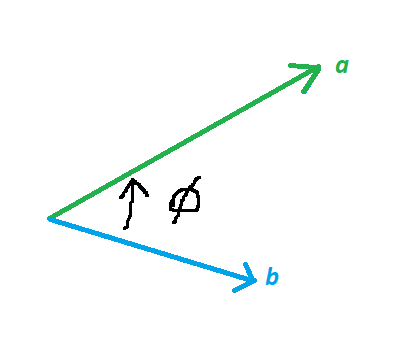

The vectors have some geometric representation related to their **magnitude** and **angle** they form (be it with respect to a reference or each other). You might recall that the magnitude of a vector is given by

$$
\Vert \boldsymbol{x} \Vert_2 = \sqrt{\sum_{n=1}^N \vert x_i \vert ^2},
$$

which can be interpreted as the **length** of the vector. The notation $\Vert \cdot \Vert_2$ stands for the so-called $\ell_2$ norm. For now, let's just assume that there is an angle $\phi$ between our two vectors $\boldsymbol{a}$ and $\boldsymbol{b}$. Don't worry about how to calculate that angle. If we can calculate the magnitudes as shown before, we can alternatively calculate the dot product between the vectors as 

$$
\boldsymbol{a} \cdot \boldsymbol{b} = \Vert \boldsymbol{a} \Vert_2 \Vert \boldsymbol{b} \Vert_2 \cos{\phi}.
$$

If we ever need it, we can just go ahead and calculate the angle from this expression :P. The dot product depends on the length of the vectors, sure, but pay attention to the cosine term. It gives us an idea of how similar the **direction** of the two vectors is! If the two vectors are **parallel**, then the angle is $\phi=0$ and the cosine term vanishes. On the other hand, two vectors at an angle $\phi = \pi/2$ are **orthogonal** to each other, and their dot product is 0. 

#### Cauchy-Schwarz Inequality

Does the previous discussion ring a bell? You've probably heard the same idea under the name **Cauchy-Schwarz inequality**, which tells us that

$$
\boldsymbol{a} \cdot \boldsymbol{b} \leq \Vert \boldsymbol{a} \Vert_2 \Vert \boldsymbol{b} \Vert_2,
$$

or in other words, **the maximum dot product is achieved when the two vectors are parallel**. Furthermore, if both vectors have a norm of 1, the dot product is entirely given by the angle between the vectors. This can be interpreted as a measure of the **similarity** between the vectors: if the angle is the same, the vectors are identical. On the other hand, an angle of 90° means the vectors have nothing to do with one another. Be careful, though! You might think that an angle of 180° might be the most "different" two vectors can be, but in reality this also means that the vectors are parallel, just pointing in opposite directions!

#### Notation

There's more than one way of representing all of these things. In signal processing, we tend to go by the rules *all vectors are column vectors* and *treat vectors as matrices when multiplying*. Seems a bit unnecessary, right? It does make the math easier to read and understand, though. You'll also notice that this ties in quite nicely to some of the stuff we will discuss in just a bit. Let's set all the rules of the game:
* all vectors are column vectors
* row vectors are obtained by taking a **transpose** $\boldsymbol{x}^{\text{T}}$ or a **Hermitian transpose** $\boldsymbol{x}^{\text{H}} = (\boldsymbol{x}^{*})^{\text{T}}$
* respect the matrix multiplication rules (dimensions must match)!

What this means for us is that

$$
\boldsymbol{a}^{\text{H}} \boldsymbol{b} =
\begin{bmatrix}
a_1^* & a_2^* & \dots & a_n^*
\end{bmatrix}
\begin{bmatrix}
b_1\\
b_2\\
\vdots\\
b_N
\end{bmatrix}
= \boldsymbol{a} \cdot \boldsymbol{b}
$$

with no need to distinguish this type of multiplication from matrix-vector or matrix-matrix products.

#### Magnitude

Let's recap that $\ell_2$ norm from before. Using our column vector notation, we can rewrite it as

$$
\Vert \boldsymbol{x} \Vert_2 = \sqrt{\boldsymbol{x}^{\text{H}} \boldsymbol{x}}.
$$

Let's just test it out in code really quick.


In [3]:
import numpy as np
import numpy.linalg as nlin

x = np.array([1,2,3,4,5,6])

#this will be our reference. this built-in function computes the norm of x, and we specify we want the 2 norm.
reference = nlin.norm(x, 2)

#now, we do it by hand following our two definitions:
#definition 1:
d1 = np.sqrt( np.sum( np.power( np.abs( x ) , 2) ) )

#defnition 2:
d2 = np.sqrt(x.conjugate().T.dot(x))

print(reference)
print(d1)
print(d2)

9.539392014169456
9.539392014169456
9.539392014169456


Sweet, it works! Let's move on, then.

---

## Matrices

With our handy-dandy notation from the previous section, this'll be pretty easy. You might have learned some messy ways of multiplying with matrices: go element by element, follow the rows on the left matrix and the columns on the right one, etc. Just following those steps doesn't give much intuition about what's happening. We already saw that vectors have some sort of meaning, geometrical or otherwise, attached to them. Matrices do, too!

#### Row Representation

This is the one you learn about in your introductory linear algebra courses... you just never knew. Let $\boldsymbol{W} \in \mathbb{C}^{M \times N}$ and $\boldsymbol{x} \in \mathbb{C}^N$. The matrix $\boldsymbol{W}$ can be represented with row vectors as

$$
\boldsymbol{W} = 
\begin{bmatrix}
\boldsymbol{a}_1^{\text{H}} \\
\boldsymbol{a}_2^{\text{H}} \\
\vdots \\
\boldsymbol{a}_M^{\text{H}}
\end{bmatrix},
$$

from which the matrix-vector product $\boldsymbol{Wx}$ can be straightforwardly computed as

$$
\boldsymbol{Wx} = 
\begin{bmatrix}
\boldsymbol{a}_1^{\text{H}} \boldsymbol{x}\\
\boldsymbol{a}_2^{\text{H}} \boldsymbol{x}\\
\vdots \\
\boldsymbol{a}_M^{\text{H}} \boldsymbol{x}
\end{bmatrix} =
\begin{bmatrix}
\sum_{n=1}^N a_{1n}^* x_n\\
\sum_{n=1}^N a_{2n}^* x_n\\
\vdots \\
\sum_{n=1}^N a_{Nn}^* x_n
\end{bmatrix}
.
$$

Pretty neat, huh? Each element in the resulting column vector comes from a dot product, meaning the result depends on how similar the rows of $\boldsymbol{W}$ are to $\boldsymbol{x}$.

#### Column Representation

This next one can be found by rearranging terms in that obscure definition of matrix multiplication you heard from your teachers. We won't do it by hand here, but we'll corroborate it with some code examples in a bit. Our matrix can be presented columnwise as

$$
\boldsymbol{W} = \left[\boldsymbol{b}_1 \, \boldsymbol{b}_2 \, \dots \, \boldsymbol{b}_N \right].
$$

The product now looks like

$$
\boldsymbol{Wx} = \sum_{n=1}^N \boldsymbol{b}_n x_n,
$$

but what does this even mean? Well, the sum looks something like $\boldsymbol{b}_1 x_1 + \boldsymbol{b}_2 x_2 + \cdots + \boldsymbol{b}_N x_N$. Recognize this type of expression? The product $\boldsymbol{Wx}$ is a **linear combination** of the columns of $\boldsymbol{W}$, and the coefficients are the elements of $\boldsymbol{x}$.

#### Wrap-up

Matrix-vector products can be interpreted either as dot products between the rows of the matrix and the vector, or as a linear combination of the matrix columns that is *weighed* by the vector. Which interpretation we use depends on what we're doing. We will look at a concrete example of such an interpretation at the end of this review. For now, we'll just go ahead and play with these two definitions of matrix-vector product to convince ourselves that they're equivalent.

In [7]:
#let's define a matrix to play around
W = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]]) #matrix of size 4 x 3

#vector to multiply with:
x = np.array([0.3, -1.2, 1])

#reference result using built-in functions:
reference = W.dot(x)

#result using the row representation:
row_result = np.zeros(4)
for iter in range(4):
    row_result[iter] = W[iter, :].dot(x)
    
#result using the column representation:
col_result = np.zeros(4)
for iter in range(3):
    col_result = col_result + W[:, iter]*x[iter]
    
print(reference)
print(row_result)
print(col_result)

[0.9 1.  1.1 1.2]
[0.9 1.  1.1 1.2]
[0.9 1.  1.1 1.2]


Awesomesauce. As a final example for the column representation, it's easy to test that the result really is a sum of the columns in $\boldsymbol{W}$. All we need to do is multiply by vectors that have a single 1 in them, and see what pops out.

In [11]:
print(W)
print() #lazy
print(W.dot([1,0,0]).reshape(4,1))
print() #lazy
print(W.dot([0,1,0]).reshape(4,1))
print() #lazy
print(W.dot([0,0,1]).reshape(4,1))

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

[[1]
 [2]
 [3]
 [4]]

[[2]
 [3]
 [4]
 [5]]

[[3]
 [4]
 [5]
 [6]]


There we go. Next section, then.

---

## Integration

Wait, what? How did we end up here? Well, notice that the operations we carried out in the previous sections involved only addition and multiplication. They did so in a way that satisfies some properties of so-called **linearity**. Integrals also have these properties. Don't worry about it for now, it'll all come together as we go along. To begin, a definition.

#### Riemann Sum

One definition for integration is the Riemann sum. Take a look at this image that was... "borrowed" from Google.

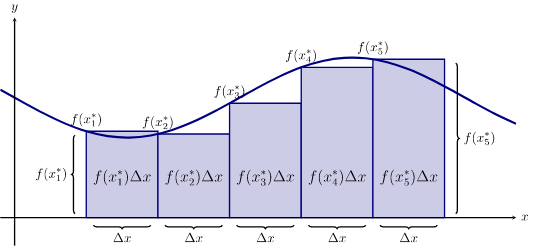

The idea is that the area under a curve can be approximated by adding up rectangles. Each rectangle has a base of length $\Delta_x$ here, and the height is chosen so that the rectangle matches some function $f(x)$ with its left corner. The area of each rectangle is then $f[x_n]\Delta_x$ (please ignore the asterisks in the image). The overall estimate of the function's area is

$$
A \approx \sum_{n=1}^N f[x_n] \Delta_x.
$$

When $\Delta_x$ becomes small enough, this sum is identically equal to the true integral of $f(x)$. This means that

$$
A = \lim_{\Delta_x \to 0} \sum_{n=1}^N f[x_n] \Delta_x = \int f(x) dx.
$$

We can test it out with some code. Let $f(x) = \cos(x)$, and we would like to integrate it from 0 to $\pi/2$. This can be computed by evaluating the antiderivative of $\cos(x)$ at the integration limits, resulting in $\sin(\pi/2) - \sin(0) = 1$.

In [14]:
#let's compare the above result vs Riemann sums with different values of \Delta_x
dx = 0.5
domain = np.arange(0, np.pi/2, dx)
approx = np.sum(np.cos(domain))*dx
print(approx)

dx = 0.1
domain = np.arange(0, np.pi/2, dx)
approx = np.sum(np.cos(domain))*dx
print(approx)

dx = 0.01
domain = np.arange(0, np.pi/2, dx)
approx = np.sum(np.cos(domain))*dx
print(approx)

dx = 0.001
domain = np.arange(0, np.pi/2, dx)
approx = np.sum(np.cos(domain))*dx
print(approx)


1.2443110347131077
1.0502004622913048
1.004995331220808
1.0004999977618818


As expected, the smaller $\Delta_x$ gets, the better the approximation. W00t!


#### Inner Product

So, let's see what we can make out of this. Let's say we have two functions $a(x)$ and $b(x)$, and we want to calculate the following integral... for whatever reason.

$$
\int a^*(x) b(x) dx
$$

If we express this as a Riemann sum, we get the following.

$$
\int a^*(x) b(x) dx = \lim_{\Delta_x \to 0} \sum_{n=1}^N a^*[x_n] b[x_n] \Delta_x
$$

Wait, that looks awfully familiar. Let's try something out. Let's ignore the limit for a while and put all of the samples $a[x_n]$ into a vector $\boldsymbol{a}$, and similarly for $\boldsymbol{b}$. We revisit the previous expression once more and arrive at

$$
\int a^*(x) b(x) dx \approx \boldsymbol{a}^{\text{H}} \boldsymbol{b} \Delta_x,
$$

from which we can see that this type of integral is terribly similar to a dot product. In fact, both the dot product and this type of integral are what's known as an **inner product**, and they have the same interpretation. The integral tells us how similar the two functions are, and allows us to speak of such things like **orthogonality** of functions. Disclaimer: to be completely fair, this is kind of hand-wavy and several details were glossed over. You can read about inner product spaces, Hilbert spaces and square integrable functions if you want to know more about the deets. For now, suffice to say that the two operations have the same meaning. 

#### Fourier Transforms

Hold up, this is going kinda fast. In all seriousness though, we've just covered all of the necessary stuff to talk about Fourier transforms. Check it out.

$$
\int_{-\infty}^{\infty} \exp(- \jmath 2 \pi f t) h(t) dt
$$

now let $g(t) = \exp(\jmath 2 \pi f t)$. If we substitute this back into the Fourier transform definition above, we get

$$
\int_{-\infty}^{\infty} g^*(t) h(t) dt,
$$

which we recognize as an inner product. This means the Fourier transform compares the function $h(t)$ to complex sinusoids of the form $g(t)$. Each value in the Fourier transform tells us how similar $h(t)$ is to a sinusoid of that frequency. Furthermore, we can use Riemann sums and wave our hands a little to arrive right up at the Discrete Fourier Transform (DFT), which the famous Fast Fourier Transform (FFT) algorithm computes super quickly.

Let's start by writing the transform in terms of a discretized time variable.

$$
\sum_{n=-\infty}^{\infty} \exp[- \jmath 2 \pi f t_n] h[t_n]
$$

The $\Delta_t$ scaling factor is ignored for simplicity. This is the Discrete Time Fourier Transform (DTFT), closely related to the Z-transform. In practice, we have to limit $n$ to a small range in order for a computer to store these values and carry out the computation, meaning the summation interval can be changed to 

$$
\sum_{n=1}^{N} \exp[- \jmath 2 \pi f t_n] h[t_n].
$$

In a similar fashion, not only are we unable to store a continuous frequency variable, we probably only care about a small bandwidth anyway (not to mention the Nyquist frequency is a thing... more on that some other time). We can then discretize the frequency variable $f$. Let's take $N$ frequency values. Each of these values can be computed in the same way as above. We just arrange them in a vector like so.

$$
\begin{bmatrix}
\sum_{n=1}^{N} \exp[- \jmath 2 \pi f_1 t_n] h[t_n] \\
\sum_{n=1}^{N} \exp[- \jmath 2 \pi f_2 t_n] h[t_n] \\
\vdots \\
\sum_{n=1}^{N} \exp[- \jmath 2 \pi f_N t_n] h[t_n] \\
\end{bmatrix}
$$

This is the DFT. We can rearrange some stuff using everything we have covered so far, though. Let's start by conjugating the exponentials:

$$
\begin{bmatrix}
\sum_{n=1}^{N} \exp^*[\jmath 2 \pi f_1 t_n] h[t_n] \\
\sum_{n=1}^{N} \exp^*[\jmath 2 \pi f_2 t_n] h[t_n] \\
\vdots \\
\sum_{n=1}^{N} \exp^*[\jmath 2 \pi f_N t_n] h[t_n] \\
\end{bmatrix}
$$

Now, we get rid of the sum by simply gathering the samples in vectors. We will collect the discrete time values $t_n$ in a vector $\boldsymbol{t} \in \mathbb{R}^N$ and the samples $h[t_n]$ in a vector $\boldsymbol{h} \in \mathbb{C}^N$. Plugging these back in, we obtain

$$
\begin{bmatrix}
\exp(\jmath 2 \pi f_1 \boldsymbol{t})^{\text{H}} \boldsymbol{h} \\
\exp(\jmath 2 \pi f_2 \boldsymbol{t})^{\text{H}} \boldsymbol{h} \\
\vdots \\
\exp(\jmath 2 \pi f_N \boldsymbol{t})^{\text{H}} \boldsymbol{h} \\
\end{bmatrix}
=
\begin{bmatrix}
\exp(\jmath 2 \pi f_1 \boldsymbol{t})^{\text{H}} \\
\exp(\jmath 2 \pi f_2 \boldsymbol{t})^{\text{H}} \\
\vdots \\
\exp(\jmath 2 \pi f_N \boldsymbol{t})^{\text{H}} \\
\end{bmatrix} \boldsymbol{h}.
$$

This last matrix that is multiplying the vector $\boldsymbol{h}$ is known as a DFT or Fourier matrix, and it can be interpreted by means of the row representation of matrix-vector products. Each element in the resulting vector is an inner product between the samples taken from the signal $h(t)$ and a complex exponential of a particular frequency. That is to say, a Fourier coefficient in the resulting vector is large if the signal is similar to that complex sinusoid, i.e. that frequency component is strongly present in the signal.

**DISCLAIMER: We've just glossed over several details. Things like periodicity, number of samples, spacing between samples, and more were just ignored for simplicity. For now, we're focusing only on the intuition. You're free to read more about this on your own (the explanation of the four flavors of Fourier transforms are pretty ok on Wikipedia), and Florian or someone else can follow up on these topics upon request.**

---

## Adventure Time!

All righty, time to put these things to practice. There's three tasks here that will get you to exercise the concepts we've reviewed.

#### Task 1: Integration

Let's do some integration first. Let's say we want to approximate the following integral:

$$
\int _0 ^{1/2} \cos(2 \pi t) dt
$$

Use a $\Delta_t$ to sample $\cos(2 \pi t)$, and store those samples in a vector $\boldsymbol{v}$. This vector is real, and so $\boldsymbol{v}^{\text{H}} = \boldsymbol{v}^{\text{T}}$. Find the vector $\boldsymbol{w}$ so that

$$
\int _0 ^{1/2} \cos(2 \pi t) dt \approx \boldsymbol{v}^{\text{T}} \boldsymbol{w}.
$$

#### Task 2: More integration D:

Now, we want to carry out 4 integrals at the same time. Say we want to approximate the following matrix:

$$
\begin{bmatrix}
\int_0 ^{1/2} t \cos(2 \pi t) dt && \int_0 ^{1/2} t \sin(2 \pi t) dt \\
\int_0 ^{1/2} t^2 \cos(2 \pi t) dt && \int_0 ^{1/2} t^2 \sin(2 \pi t) dt \\
\end{bmatrix}
$$

Find two matrices $\boldsymbol{A}$ and $\boldsymbol{B}$ so that $\boldsymbol{A} \boldsymbol{B}^{\text{T}}$ gives us an approximation of the integrals.

**Hint**: Let's imagine we have the matrices $\boldsymbol{A} = [\boldsymbol{a}_1 \, \boldsymbol{a}_2]^{\text{T}}$ and $\boldsymbol{B} = [\boldsymbol{b}_1 \, \boldsymbol{b}_2]^{\text{T}}$. Check out what happens when we do $\boldsymbol{A} \boldsymbol{B}^{\text{T}}$:

$$
\boldsymbol{A} \boldsymbol{B}^{\text{T}} =
\begin{bmatrix}
\boldsymbol{a}_1^{\text{T}} \\
\boldsymbol{a}_2^{\text{T}}
\end{bmatrix}
\begin{bmatrix}
\boldsymbol{b}_1 && \boldsymbol{b}_2
\end{bmatrix} =
\begin{bmatrix}
\boldsymbol{a}_1^{\text{T}} \boldsymbol{b}_1 && \boldsymbol{a}_1^{\text{T}} \boldsymbol{b}_2 \\
\boldsymbol{a}_2^{\text{T}} \boldsymbol{b}_1 && \boldsymbol{a}_2^{\text{T}} \boldsymbol{b}_2 \\
\end{bmatrix}
$$

#### Task 3: DFT of several signals

Finally, we'd like to find the DFT of 3 signals at the same time. We have the signals $\cos(2 \pi t)$, $\cos(4 \pi t)$, and $\cos(8 \pi t)$. We would like to obtain their time samples in the range $t=0$ up to $t=2$, and we would like to do so in a way that we end up with exactly 256 time samples. We can do this by using, for example, "t = np.linspace(0, 2, 256)". Build a DFT matrix using "DFT = scipy.linag.dft(256)" (remember to import scipy.linalg!). Arrange the samples of the 3 signals in a matrix $\boldsymbol{M}$ so that each of the columns of the matrix obtained from the product $\boldsymbol{FM}$ contains the DFT of one of the signals.